**데이터셋 탐색 및 전처리**  
-결측치 처리  
-이상치 탐지 및 제거  
-특징 선택  

**여러 회귀 모델 비교**  
-선형 회귀  
-의사결정나무  
-랜덤 포레스트 등  

**모델 성능 평가**  
-지표를 사용하여 모델 성능 비교  
    -Mean Absoulte Error(MAE) : 예측값과 실제값의 절대오차의 평균  
    -Mean Squared Error(MSE) : 예측값과 실제값의 제곱 오차의 평균  
    -R² Score : 모델이 데이터의 변동성을 얼마나 설명하는지 나타내는 지표  
    
**결과 분석**  
-각 모델의 성능 비교, 최적의 모델을 선택, 결과 시각화  
    -시각화 : 성능 지표를 막대 그래프로 시각화하여 비교 용이화 (matplotlib 또는 seaborn 사용)  
    
**지도학습**  
-모델 앙상블  
    -여러 모델의 예측 결과를 결합하여 성능을 향상시키는 앙상블 기법(예: 배깅, 부스팅) 적용  
    -각 모델의 예측을 평균내거나 가중치 부여하여 최종 예측 생성  
    
**하이퍼파라미터 튜닝**  
-Grid Search 또는 Random Search 기법 이용, 모델의 하이퍼파라미터 최적화  

**시간적 요소 추가**  
-주택 데이터셋에 시간적 요소(예:계절적 변화, 경제 지표 등)를 추가하여 모델의 예측력 높임  



In [92]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
import seaborn as sns
import numpy as np

from scipy.stats import zscore
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [93]:
data = pd.read_csv("housingdata.csv")

"""
- CRIM: per capita crime rate by town / 도시의 1인당 범죄율
- ZN: proportion of residential land zoned for lots over 25,000 sq.ft. / 25,000 평방피트 이상의 대형 주택용 토지 비율
- INDUS: proportion of non-retail business acres per town / 비소매업무용 지역(산업 지역)이 차지하는 비율
- CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise) / 찰스강 경계 여부를 나타내는 더미 변수 (강에 인접한 경우 1, 그렇지 않으면 0)
- NOX: nitric oxides concentration (parts per 10 million) / 공기 중 질소 산화물 농도 (1천만 분의 1 단위)
- RM: average number of rooms per dwelling / 주택당 평균 방 개수
- AGE: proportion of owner-occupied units built prior to 1940 / 1940년 이전에 지어진 자가 주택의 비율
- DIS: weighted distances to five Boston employment centres / 보스턴 내 주요 5개 고용센터까지의 가중 거리
- RAD: index of accessibility to radial highways / 방사형 고속도로 접근성 지수
- TAX: full-value property-tax rate per $10,000 / $10,000당 부동산 세율
- PTRATIO: pupil-teacher ratio by town / 학생-교사 비율
- B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town / 1000 x (Bk - 0.63)^2 (여기서 Bk는 도시 내 흑인의 비율)
- LSTAT: % lower status of the population / 저소득층 인구 비율
- MEDV: Median value of owner-occupied homes in $1000's / 자가 주택의 중간 가격 (단위: 1,000달러)
    
"""

df = pd.DataFrame(data)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [94]:
#데이터 탐색
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


1.	히스토그램으로 분포 확인
2.	박스 플롯으로 이상치 확인
3.	QQ 플롯으로 정규성 검토
4.	기술 통계로 평균/중앙값 비교
5.	적절한 대체값으로 결측치 처리
6.	처리 후 분포와 이상치 변화 검토

In [95]:
#결측치 개수 확인
df.isna().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

<Figure size 800x500 with 0 Axes>

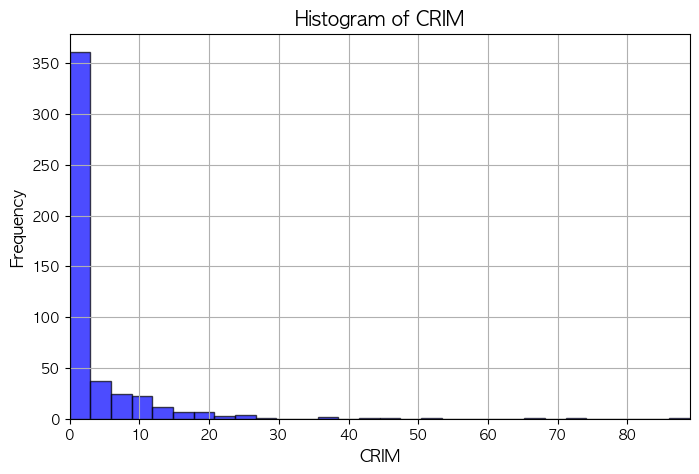

<Figure size 800x500 with 0 Axes>

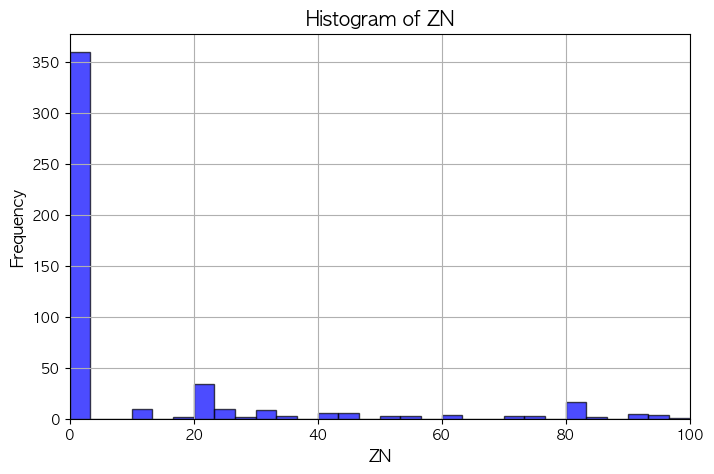

<Figure size 800x500 with 0 Axes>

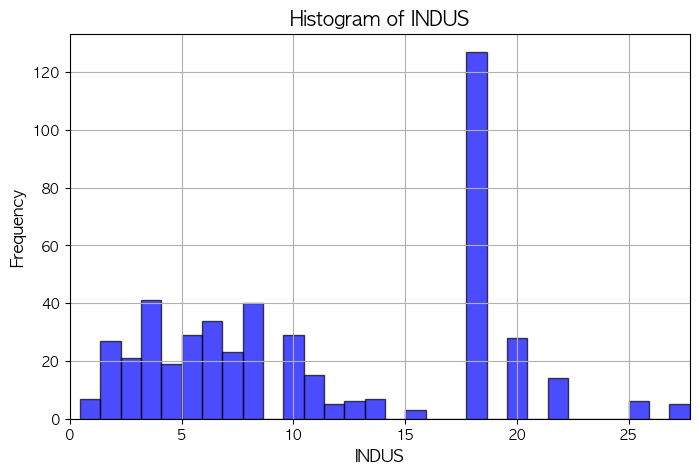

<Figure size 800x500 with 0 Axes>

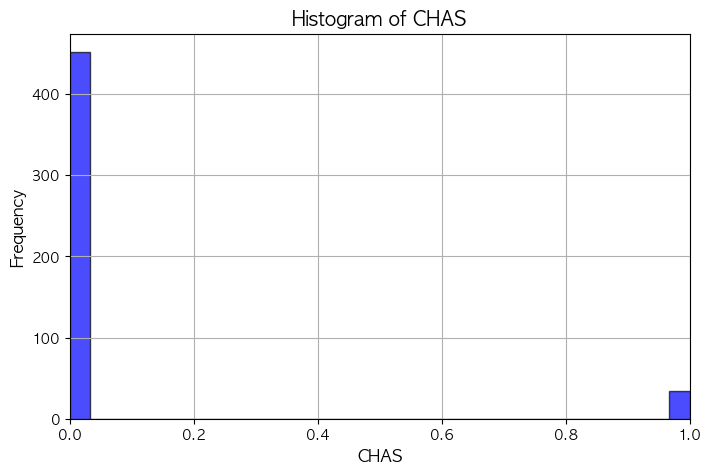

<Figure size 800x500 with 0 Axes>

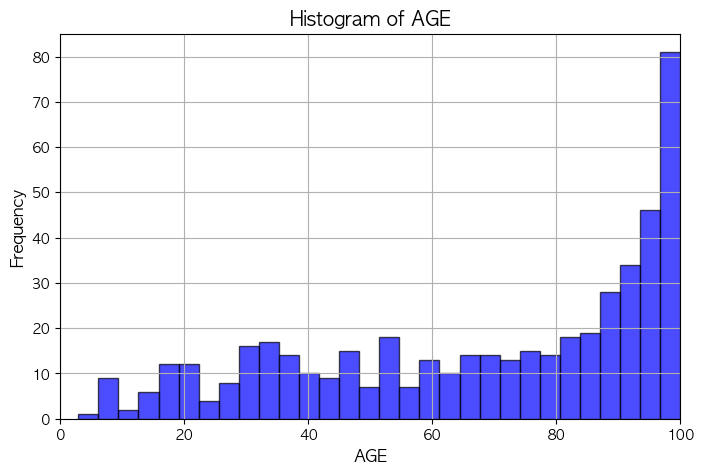

<Figure size 800x500 with 0 Axes>

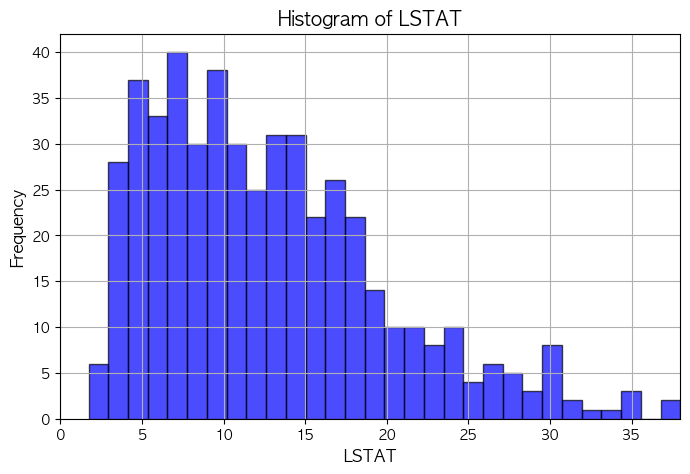

In [96]:
#히스토그램으로 결측치를 제외한 상태의 각 열의 분포 시각화
for column in df.columns:
    if df[column].isna().sum() > 0:
        max_value = df[column].dropna().max()
        plt.figure(figsize=(8, 5))
        plt.figure(figsize = (8, 5))
        plt.hist(df[column].dropna(), bins = 30, color = 'blue', alpha = 0.7, edgecolor = 'black')
        plt.title(f'Histogram of {column}', fontsize = 14)
        plt.xlabel(column, fontsize = 12)
        plt.ylabel('Frequency', fontsize = 12)
        plt.grid(True)
        plt.xlim(0, max_value)
        plt.ylim(0, None)
        plt.show()


##### 분포 모양, 빈도 분석


**CRIM**  
오른쪽으로 긴 꼬리가 있는 비대칭적 분포  
데이터의 대부분이 0~10에 집중  
왜곡된 분포  

**ZN**  
데이터가 0에 몰려있음
일부 값이 20~100 구간에 분포하지만, 전체적으로 비대칭적

**INDUS**  
비교적 넓게 분포되어 있지만 15~20 근처에서 값이 몰림
대체로 비대칭적, 왜곡된 형태

**CHAS**  
이진 데이터(0과 1로 구성)
0이 대부분을 차지 -> 분포가 정규성을 가질 수 없음

**AGE**  
왼쪽으로 긴 꼬리를 가진 분포
데이터 상당수가 80~100 사이에 몰려 있고, 일부는 낮은값에 분포

**LSTAT**  
데이터가 좌우로 퍼져 있는 왜곡된 분포
5~10 구간에 데이터가 집중, 일부 값이  30  이상으로 치우쳐 있음


****결론 및 대체 전략****

1. 정규성을 가정하기 어렵다
=> 히스토그램에서 대부분의 열이 왜곡된 분포를 보여 평균값을 대체값으로 사용하면 데이터가 왜곡될 가능성이 있음

2. 중앙값 대체 고려
=> 대부분의 열이 비대칭적이고 이상치가 존재할 가능성이 높으므로, 중앙값으로 대체하는 것이 적합해 보임

3. CHAS열의 특별 처리(MODE)
=>CHAS는 이진 데이터이므로, 중앙값보다는 최빈값으로 대체하는 것이 적합

4. 박스 플롯으로 이상치 확인
LSTAT, AGE 데이터는 분포가 길게 늘어진 양상을 보여 이상치 확인 후 로그 변환도 고려

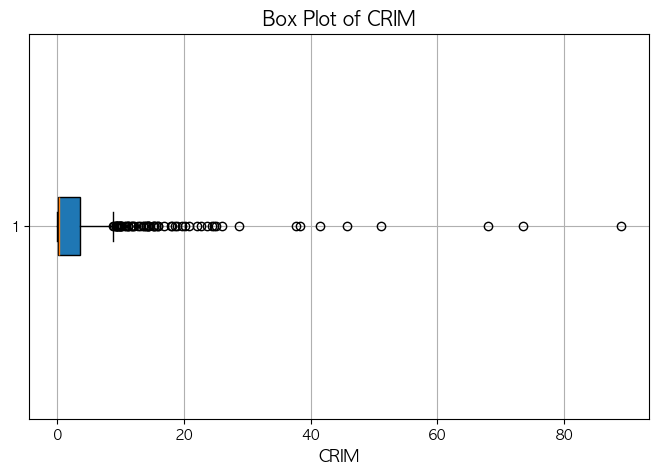

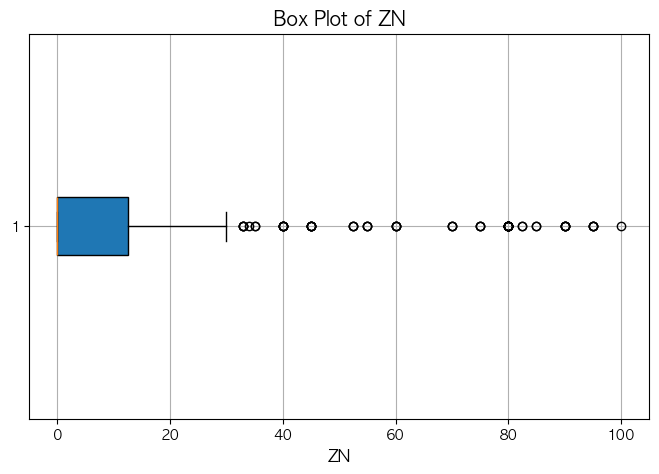

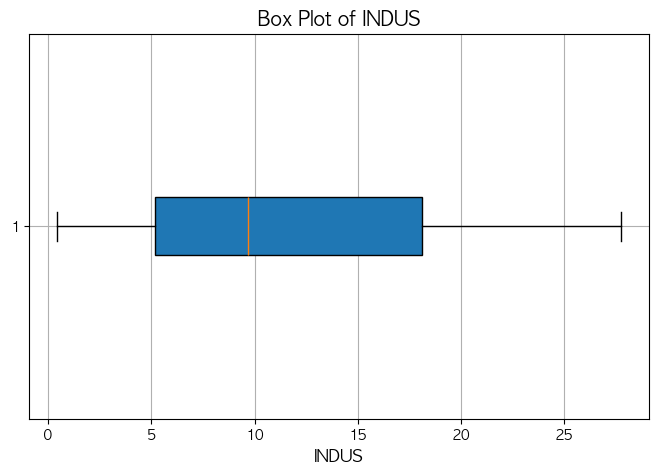

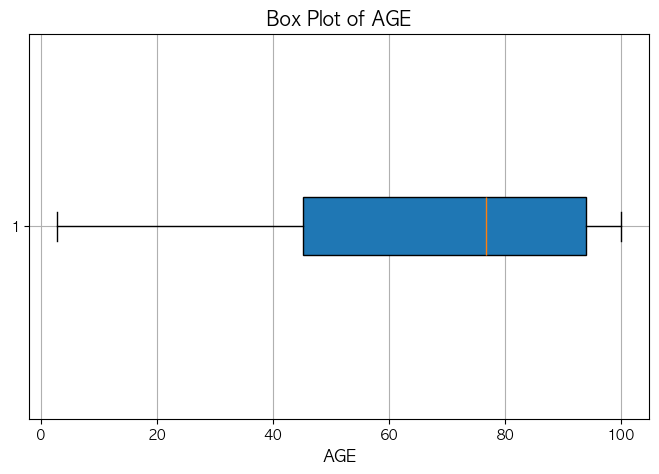

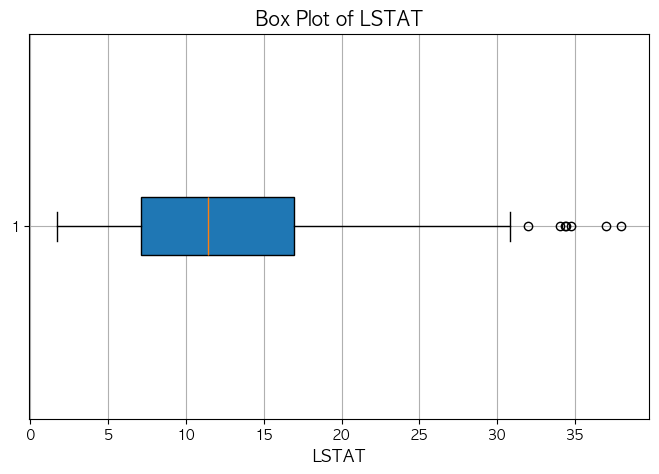

In [97]:
# 결측치가 있는 열을 대상으로 박스 플롯 생성
columns_with_missing = ['CRIM', 'ZN', 'INDUS', 'AGE', 'LSTAT']

for column in columns_with_missing:
    plt.figure(figsize=(8, 5))
    plt.boxplot(df[column].dropna(), vert=False, patch_artist=True)
    plt.title(f'Box Plot of {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.grid(True)
    plt.show()

**CRIM**  
이상치가 매우 많음 : 10 이상에서 다수의 이상치 관찰  
대부분의 데이터는 0~10 구간에 분포하며, 극단적으로 큰 값이 많음  

이상치를 제거하기에는 이상치가 다수이고, 평균값, 중앙값 대체는 왜곡 가능성이 높다.  
다른 변수와의 관계를 활용하여 결측치를 채워줄 예정

**ZN**  
20~10구간에 이상치가 다수 분포  
데이터 수치상 이상치이나 컬럼 특성상 의미 있는 값들이라 봄
데이터 대부분이 0에 몰려 있음  

다른 변수와의 관계를 활용하여 결측치를 채워줄 예정

**INDUS**  
이상치 없음  
데이터가 고르게 분포하며, 중앙값이 평균과 큰 차이가 없을 가능성이 높음  

평균값 or 중앙값 중 AGE칼럼이랑 한번에 중앙값으로 대체해줄 예정 

**AGE**  
이상치 없음  
대부분의 데이터가 80~100 구간에 분포, 왼쪽 꼬리가 길게 형성된 분포  
중앙값을 결측치 대체값으로 사용하는 것이 적합(이상치가 없으므로 데이터의 연속성을 유지하며 대체 가능)  

**LSTAT**  
30\~35 이상에서 다수의 이상치 관찰  
데이터의 대부분은 5\~20 구간에 분포  

이상치 제외한 상태로 중앙값을 대체값으로 사용

<br>
<br>


#### CHAS : 최빈값
#### CRIM : KNNImputer
#### ZN : KNNImputer    
#### INDUS : 중앙값    
#### AGE : 중앙값    
#### LSTAT : 이상치 제외한 중앙값  
<br>


In [98]:
#CHAS : 최빈값으로 결측치 채우기, int형으로 dtype변환
df['CHAS'] = df['CHAS'].fillna(df['CHAS'].mode()[0])
df['CHAS'] = df['CHAS'].astype('int8')
print("결측치 확인: \n")
print(df.isna().sum())
print("\n\ndtype 변환 확인: \n")
df.info()


결측치 확인: 

CRIM       20
ZN         20
INDUS      20
CHAS        0
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64


dtype 변환 확인: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     506 non-null    int8   
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(2), int8(1)
memory usage

In [99]:
#INDUS, AGE : 중앙값으로 결측치 채우기
df.loc[:, ['INDUS', 'AGE']]=df[['INDUS', 'AGE']].fillna(df[['INDUS','AGE']].median())
df.isna().sum()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int8   
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(2), int8(1)
memory usage: 52.0 KB


In [100]:
#LSTAT : 이상치 제외하고 중앙값으로 결측치 채우기
df['LSTAT'].describe()

count    486.000000
mean      12.715432
std        7.155871
min        1.730000
25%        7.125000
50%       11.430000
75%       16.955000
max       37.970000
Name: LSTAT, dtype: float64

In [101]:
# Z-Score 계산 및 이상치 필터링
z_scores = zscore(df['LSTAT'].dropna()) #결측치 제외하고 Z-Score 계산
filtered_values = df['LSTAT'].dropna()[abs(z_scores) <= 3] #이상치 제거

#중앙값 계산
median_without_outliers = filtered_values.median()

#결측치 대체
df['LSTAT'] = df['LSTAT'].fillna(median_without_outliers)

df.isna().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int8   
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(2), int8(1)
memory usage: 52.0 KB


ZN         1.000000
DIS        0.656739
MEDV       0.373136
RM         0.320800
B          0.171303
CHAS      -0.035003
CRIM      -0.191178
RAD       -0.310919
TAX       -0.312371
LSTAT     -0.408879
PTRATIO   -0.414046
NOX       -0.513704
INDUS     -0.522545
AGE       -0.554406
Name: ZN, dtype: float64


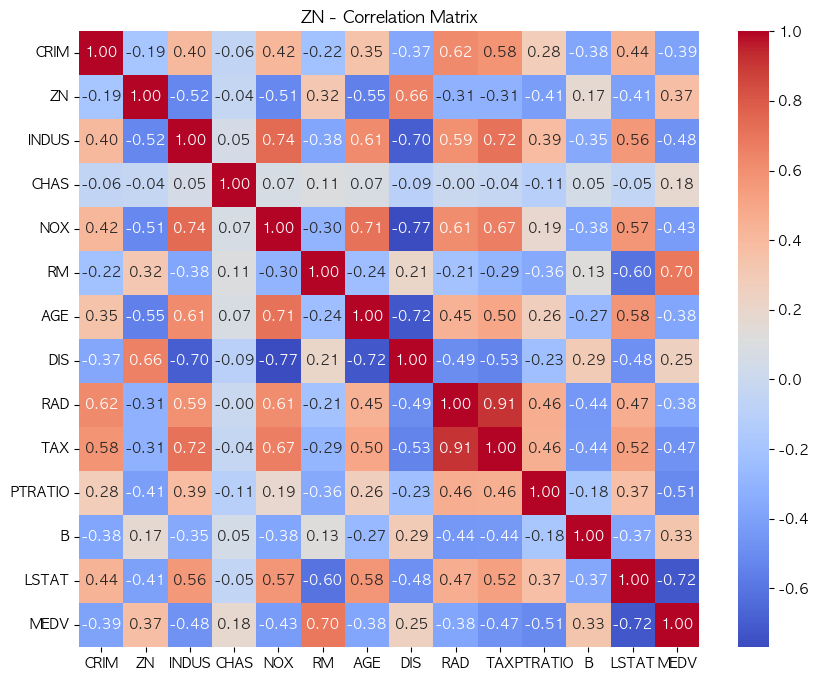

In [102]:
#ZN 컬럼과 나머지 변수의 상관계수 계산
correlation_matrix = df.corr()

#ZN과 다른 변수 간 상관관계 추출
zn_correlation = correlation_matrix['ZN'].sort_values(ascending = False)

#상관계수 출력
print(zn_correlation)


#상관관계 히트맵 시각화
plt.figure(figsize = (10, 8))
sns.heatmap(correlation_matrix, annot = True, fmt = ".2f", cmap = 'coolwarm')
plt.title('ZN - Correlation Matrix')

plt.show()


In [103]:
#ZN : KNNImputer로 대체

# KNNImputer 초기화
imputer = KNNImputer(n_neighbors=4)

# KNNImputer 적용: DIS, NOX, INDUS, AGE 변수 고려
imputed_data = imputer.fit_transform(df[['ZN', 'DIS', 'NOX', 'INDUS', 'AGE']])

# 결과를 원래 데이터프레임에 반영
df[['ZN', 'DIS', 'NOX', 'INDUS', 'AGE']] = imputed_data

# 결측치 확인
df.isna().sum()

CRIM       20
ZN          0
INDUS       0
CHAS        0
NOX         0
RM          0
AGE         0
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT       0
MEDV        0
dtype: int64

CRIM       1.000000
RAD        0.624765
TAX        0.580595
LSTAT      0.439812
NOX        0.417130
INDUS      0.399872
AGE        0.350128
PTRATIO    0.281110
CHAS      -0.055323
ZN        -0.191178
RM        -0.219150
DIS       -0.374166
B         -0.381411
MEDV      -0.391363
Name: CRIM, dtype: float64


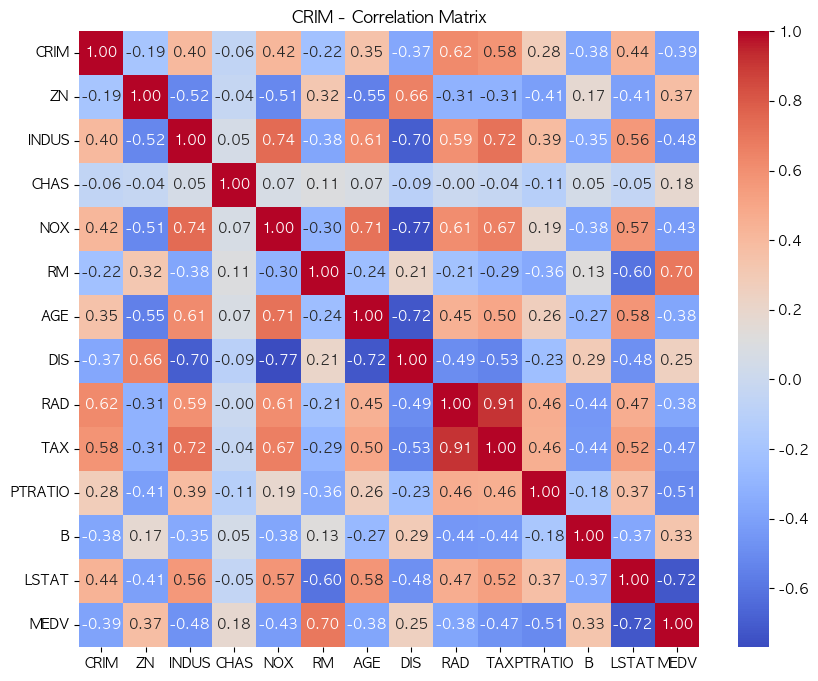

In [104]:
#CRIM 컬럼과 나머지 변수의 상관계수 계산

#CRIM과 다른 변수 간 상관관계 추출
crim_correlation = correlation_matrix['CRIM'].sort_values(ascending = False)

#상관계수 출력
print(crim_correlation)

#상관관계 히트맵 시각화
plt.figure(figsize = (10, 8))
sns.heatmap(correlation_matrix, annot = True, fmt = ".2f", cmap = 'coolwarm')
plt.title('CRIM - Correlation Matrix')
plt.show()

In [105]:
#CRIM : KNNImputer로 대체

# KNNImputer 초기화
imputer = KNNImputer(n_neighbors=2)

# KNNImputer 적용: DIS, NOX, INDUS, AGE 변수 고려
imputed_data = imputer.fit_transform(df[['CRIM','RAD','TAX']])

# 결과를 원래 데이터프레임에 반영
df[['CRIM','RAD','TAX']] = imputed_data

# 결측치 확인
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [106]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.575211,11.384140,11.028893,0.067194,0.554695,6.284634,68.845850,3.795043,9.549407,408.237154,18.455534,356.674032,12.661067,22.532806
std,8.569226,23.364844,6.704679,0.250605,0.115878,0.702617,27.486962,2.105710,8.707259,168.537116,2.164946,91.294864,7.017868,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.925000,2.100175,4.000000,279.000000,17.400000,375.377500,7.230000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.340000,21.200000
75%,3.689388,12.500000,18.100000,0.000000,0.624000,6.623500,93.575000,5.188425,24.000000,666.000000,20.200000,396.225000,16.570000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int8   
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(13), int8(1)
memory usage: 52.0 KB


In [108]:
df['RAD'] = df['RAD'].astype('int8')
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS          int8
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD           int8
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

#### 특징 선택 여부 결정  
1. 상관관계 기준
높은 상관관계를 가진 특징들 중 하나를 제거
2. 특징 중요도 기준
트리 기반 모델을 사용해 중요도가 낮은 특징 제거
3. 교차 검증 기준
특징 선택 전후의 모델 성능 비교


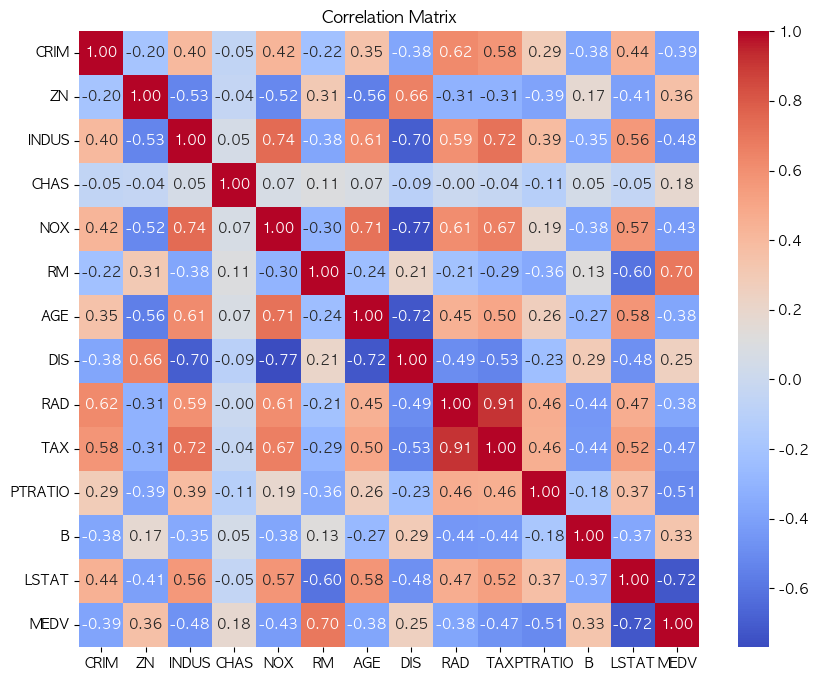

높은 상관관계 특징들:  {'TAX', 'DIS', 'AGE', 'NOX'}


In [109]:
#상관관계 행렬 초기화
correlation_matrix = df.corr()

#히트맵으로 상관관계 확인
plt.figure(figsize = (10, 8))
sns.heatmap(correlation_matrix, annot = True, fmt = ".2f", cmap = "coolwarm")
plt.title("Correlation Matrix")
plt.show()

#상관관계가 높은 특징 제거
threshold = 0.7 #상관계수 기준
high_corr_features = set()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            if colname != 'MEDV':
                high_corr_features.add(colname)

print("높은 상관관계 특징들: ", high_corr_features)

df_reduced_corr = df.drop(columns = high_corr_features)

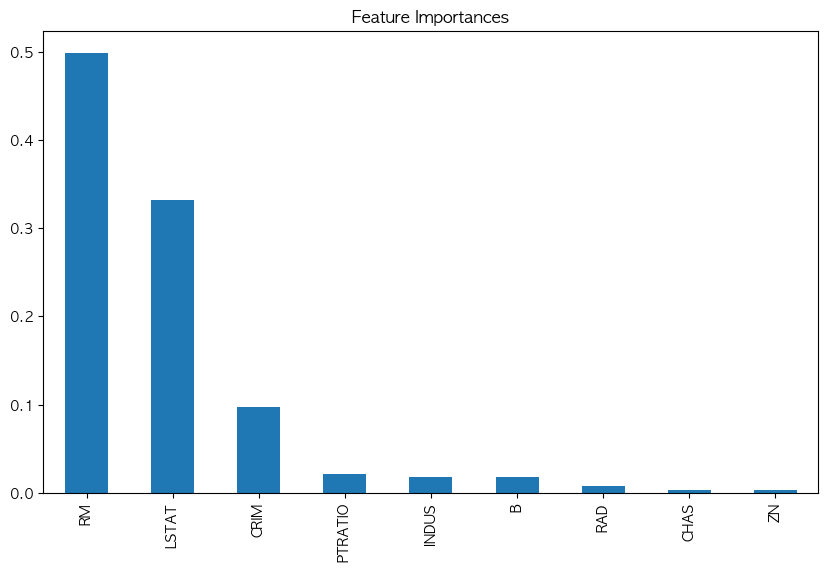

선택된 특징들:  ['CRIM', 'INDUS', 'RM', 'PTRATIO', 'B', 'LSTAT']


In [110]:
#트리 기반 모델로 중요도 낮은 특징 제거
#데이터 분리
X = df_reduced_corr.drop(columns = ['MEDV']) #target 제외
y = df_reduced_corr['MEDV']

#랜덤 포레스트 모델로 특징 중요도 계산
model = RandomForestRegressor(random_state = 0)
model.fit(X, y)

#특징 중요도 시각화
importances = pd.Series(model.feature_importances_, index = X.columns)
importances.sort_values(ascending = False).plot(kind = "bar", figsize = (10, 6))
plt.title("Feature Importances")
plt.show()

#중요도가 낮은 특징 제거
low_importances_threshold = 0.01 #중요도 기준
selected_features = importances[importances > low_importances_threshold].index
X_selected = X[selected_features]

print("선택된 특징들: ", selected_features.tolist())


In [111]:
#교차 검증으로 성능 비교
#선택 전후 모델 성능 비교
model = RandomForestRegressor(random_state = 2)

#모델 특징 사용
scores_all_features = cross_val_score(model, X, y, cv = 5, scoring = 'r2')
print("모든 특징 사용 R²: ", scores_all_features.mean())

#선택된 특징만 사용
scores_selected_features = cross_val_score(model, X_selected, y, cv = 5, scoring = 'r2')
print("선택된 특징 사용 R²: ", scores_selected_features.mean())


모든 특징 사용 R²:  0.5497015050890639
선택된 특징 사용 R²:  0.5400025931526257


#### 모든 특징을 사용  
* R²(결정 계수)값이 모든 특징을 사용하였을 때 더 높음  
* 선택된 특징만 사용했을 때 약간의 모델 성능 손실이 발생  

모델 간소화를 위해 약간의 성능 손실을 감수하고 특정 선택을 할 수 있으나, 모델의 최고의 성능을 추구하므로 모든 특징을 사용할 것이다.

# 모델 앙상블과 하이퍼파라미터 튜닝, 시간적 요소 추가까지 고려하여 회귀 모델 비교  

1. Linear Regression  
가장 단순한 회귀 모델. 기본적인 기준선(baseline) 설정  
직관적이고 계산 속도가 빠르며, 데이터의 기본적 관계를 이해하기 적합할 듯  

2. Ridge Regression  
L2 정규화 적용, 다중공선성 문제 완화  
많은 특징들이 있어 모델 overfitting이 우려되므로 방지에 적합할 듯  

3. Lasso Regression  
L1 정규화 적용, 모델에서 중요하지 않은 특징들을 제거(가중치 0)할 수 있음  
모든 특징들을 사용하였으나, feature selection을 자동으로 수행하여 생각지 못한 성능이 나타날 수 있음  

4. Elastic Net Regression  
L1과 L2 정규화 결합, Ridge와 Lass 장점 모두 활용  

5. Support Vertor Regression, SVR  
비선형 관계를 처리 커널 트릭 활용  
데이터의 비선형성을 다룰 수 있고, 데이터셋이 작아서 강력한 성능을 보일 듯  

6. Decision Tree Regressor  
데이터의 비선형성과 상호작용 효과를 잘 캡처  
해석 가능성이 높음.. 전처리에 덜 민감  

7. Random Forest Regressor  
여러 개의 의사결정나무 앙상블, 과적합 방지 + 안정적 성능  
특정 중요도를 평가할 수 있어서 직관적  

8. Gradient Boosting Regressor  
이전 모델의 오차를 반복적으로 줄여 예측력 향상  
성능이 뛰어남, 시간이 지남에 따라 하이퍼파라미터 튜닝을 통해 더욱 정교해질 수 있음  

9. XGBoost  
Gradient Boosting 확장 -> 계산 속도 빠름, 과적합 방지 하이퍼파라미터 제공(커스터마이징 가능)
실무, 대회에서 널리 사용.. 강력  

10. LightGBM  
XGBoost와 비슷. Histogram기반의 학습 방식 사용, 과적합 방지 하이퍼파라미터 제공(커스터마이징 가능)
Gradiend Boosting 알고리즘-> 작은 데이터셋에서도 Random Forest나 단순 회귀 모델보다 높은 성능을 기대할 수 있음, 간단 튜닝

11. K-Nearest Neighbors, KNN Regressor  
주변 데이터 포인트의 평균으로 예측. 데이터의 비선형성에 민감  
단순한 구조, 비선형 관계를 잘 처리함  




    1. 기본 모델 학습 -> 평가 (거리 기반 모델 SVR, KNN : StandardScaler적용하여 최대한 동일 조건에서 공정하게 비교)
    2. 앙상블 모델 생성 (Voting/ Stacking) -> 평가
    3. 하이퍼파라미터 튜닝 -> 최적화
    4. 시간적 데이터 추가 -> 모델 재학습




In [112]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.utils import all_estimators

from sklearn.base import BaseEstimator, RegressorMixin


In [118]:
# XGBRegressor 호환 래퍼
class SklearnXGBRegressor(BaseEstimator, RegressorMixin):
    _estimator_type = "regressor"  # 명시적으로 설정

    def __init__(self, **params):
        self.model = XGBRegressor(**params)

    def fit(self, X, y):
        self.model.fit(X, y)
        return self

    def predict(self, X):
        return self.model.predict(X)
    
    def __sklearn_tags__(self):
            return {
                "X_types": ["2darray"],
                "non_deterministic": True,
                "requires_positive_X": False,
                "requires_positive_y": False,
            }

# LGBMRegressor 호환 래퍼
class SklearnLGBMRegressor(BaseEstimator, RegressorMixin):
    _estimator_type = "regressor"  # 명시적으로 설정

    def __init__(self, **params):
        self.model = LGBMRegressor(verbose=-1, **params)

    def fit(self, X, y):
        self.model.fit(X, y)
        return self

    def predict(self, X):
        return self.model.predict(X)

    def __sklearn_tags__(self):
        return {
                "X_types": ["2darray"],
                "non_deterministic": True,
                "requires_positive_X": False,
                "requires_positive_y": False,
            }

Model Performance:
               Model  Mean CV R^2  Test R^2   Test MSE
7   GradientBoosting     0.836890  0.704955  24.025058
9      LGBMRegressor     0.816149  0.682395  25.862058
6       RandomForest     0.805702  0.674104  26.537203
8       XGBRegressor     0.797973  0.689923  25.249057
10      KNNRegressor     0.742474  0.644167  28.974925
5       DecisionTree     0.734171  0.621350  30.832845
1              Ridge     0.711898  0.498322  40.850889
0   LinearRegression     0.711401  0.498567  40.830920
3         ElasticNet     0.711392  0.489832  41.542172
2              Lasso     0.710883  0.494308  41.177748
4                SVR     0.643659  0.483548  42.053896


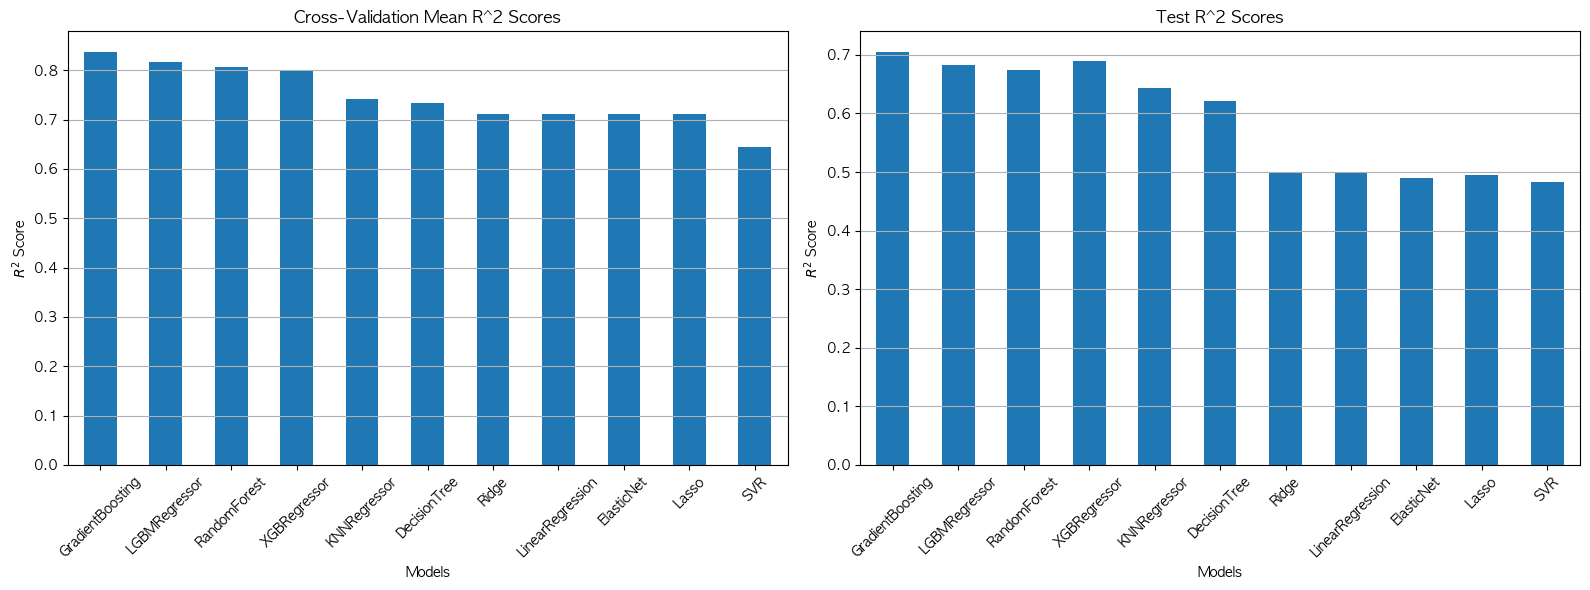

In [114]:
# 데이터셋 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#데이터 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 모델 리스트
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.1),
    "ElasticNet": ElasticNet(alpha=0.1, l1_ratio=0.5),
    "SVR": SVR(kernel="rbf", C=1.0, gamma=0.1),
    "DecisionTree": DecisionTreeRegressor(max_depth=3, random_state=0),
    "RandomForest": RandomForestRegressor(n_estimators=50, max_depth = 5, random_state=0),
    "GradientBoosting": GradientBoostingRegressor(n_estimators=100, random_state=0),
    "XGBRegressor": SklearnXGBRegressor(n_estimators=50, max_depth = 3, learning_rate = 0.1, random_state=0, objective = "reg:squarederror"),
    "LGBMRegressor": SklearnLGBMRegressor( n_estimators = 50, 
                                          learning_rate = 0.1, 
                                          min_child_samples = 5, 
                                          force_row_wise = True, 
                                          max_depth = -1, 
                                          min_gain_to_split = 0.0, 
                                          max_bin = 512, 
                                          random_state=0),
    "KNNRegressor": KNeighborsRegressor(n_neighbors=5)

}

# 결과 저장
results = []
for name, model in models.items():
    # Cross-Validation 적용
    if name in ["SVR", "KNNRegressor"]:
        scores = cross_val_score(model, X_train_scaled, y_train, scoring="r2", cv=5)
    else:
        scores = cross_val_score(model, X_train, y_train, scoring="r2", cv=5)

    # 평균 R^2 계산
    mean_cv_r2 = np.mean(scores)

    # 테스트 데이터 평가
    if name in ["SVR", "KNNRegressor"]:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    test_r2 = r2_score(y_test, y_pred)

    # 결과 저장
    results.append({"Model": name, "Mean CV R^2": mean_cv_r2, "Test R^2": test_r2, "Test MSE": mse})

# DataFrame 생성
results_df = pd.DataFrame(results).sort_values(by="Mean CV R^2", ascending=False)

# 결과 출력
print("Model Performance:")
print(results_df)

# 시각화
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Cross-Validation 결과 시각화
results_df.plot(x="Model", y="Mean CV R^2", kind="bar", ax=ax[0], legend=False, title="Cross-Validation Mean R^2 Scores")
ax[0].set_ylabel("$R^2$ Score")
ax[0].set_xlabel("Models")
ax[0].set_xticklabels(results_df["Model"], rotation=45)
ax[0].grid(axis="y")

# 테스트 데이터 결과 시각화
results_df.plot(x="Model", y="Test R^2", kind="bar", ax=ax[1], legend=False, title="Test R^2 Scores")
ax[1].set_ylabel("$R^2$ Score")
ax[1].set_xlabel("Models")
ax[1].set_xticklabels(results_df["Model"], rotation=45)
ax[1].grid(axis="y")

plt.tight_layout()
plt.show()

### 모델 성능 평가

| Model             | Mean CV R² | Test R²   | Test MSE   |
|-------------------|------------|-----------|------------|
| GradientBoosting  | 0.836890   | 0.704955  | 24.025058  |
| LGBMRegressor     | 0.816149   | 0.682395  | 25.862058  |
| RandomForest      | 0.805702   | 0.674104  | 26.537203  |
| XGBRegressor      | 0.797973   | 0.689923  | 25.249057  |
| KNNRegressor      | 0.742474   | 0.644167  | 28.974925  |
| DecisionTree      | 0.734171   | 0.621350  | 30.832845  |
| Ridge             | 0.711898   | 0.498322  | 40.850889  |
| LinearRegression  | 0.711401   | 0.498567  | 40.830920  |
| ElasticNet        | 0.711392   | 0.489832  | 41.542172  |
| Lasso             | 0.710883   | 0.494308  | 41.177748  |
| SVR               | 0.643659   | 0.483548  | 42.053896  |

**Mean CV R² (교차검증 R² 평균)**  
	•	교차검증 결과 GradientBoosting이 가장 높은 평균 R²(0.836890)  
	•	**LGBMRegressor(0.816149)**와 **RandomForest(0.805702)**도 높은 R² 값을 기록하며, 데이터의 학습 및 검증 성능이 우수  

**Test R² (테스트 데이터 R²)**  
	•	테스트 데이터에서 모델의 설명력(R²)이 높을수록 예측 성능이 좋음  
	•	GradientBoosting (0.704955)이 테스트 데이터에서도 가장 높은 성능을 기록  
	•	**XGBRegressor(0.689923)**와 **LGBMRegressor(0.682395)**도 높은 값을 보여줌  

**Test MSE (테스트 데이터 MSE)**  
	•	MSE는 예측값과 실제값 간의 차이를 제곱해 평균을 낸 값으로, 낮을수록 좋음  
	•	GradientBoosting (24.025058)이 가장 낮은 MSE를 기록  
	•	**XGBRegressor(25.249057)**와 **LGBMRegressor(25.862058)**도 근소한 차이로 뒤따르고 있음  

## 모델별 평가  

**GradientBoosting**  
	•	Mean CV R²: 0.836890  
	•	Test R²: 0.704955  
	•	Test MSE: 24.025058  
	•	교차검증 및 테스트 데이터 모두에서 가장 우수한 성능을 보임  
	•	단일 모델로도 충분히 좋은 성능을 제공  

**LGBMRegressor**  
	•	Mean CV R²: 0.816149  
	•	Test R²: 0.682395  
	•	Test MSE: 25.862058  
	•	GradientBoosting에 근접한 성능을 보이며, 빠른 학습 속도와 경량화된 모델링에 유리  
	•	성능과 속도의 균형을 원할 때 적합  

**XGBRegressor**  
	•	Mean CV R²: 0.797973  
	•	Test R²: 0.689923  
	•	Test MSE: 25.249057  
	•	LGBM보다 약간 낮은 교차검증 점수를 보이지만, 테스트 데이터에서 안정적인 성능을 제공  
	•	LGBM과 함께 앙상블 모델 구성에 적합  

**RandomForest**  
	•	Mean CV R²: 0.805702  
	•	Test R²: 0.674104  
	•	Test MSE: 26.537203  
	•	상대적으로 간단한 설정으로 우수한 성능을 제공하지만, Boosting 모델에 비해 약간 낮은 성능을 보임  
	•	Boosting 모델과의 비교를 위한 기준 모델로 적합  

**선형 회귀 계열 모델들 (Ridge, LinearRegression, Lasso, ElasticNet)**  
	•	모든 모델이 Test R²에서 0.5 미만 또는 근소하게 초과하는 수준의 낮은 성능을 보임    

**KNN 및 DecisionTree**  
	•	KNN과 DecisionTree 모두 간단한 모델링 방법으로 비교적 낮은 성능을 보임  

#### 최종 모델 선택 기준  

1. 단일 모델 선택  
	•	가장 높은 성능을 보인 GradientBoosting을 선택

2. 앙상블 모델링  
	•	GradientBoosting, LGBMRegressor, XGBRegressor를 결합하여 앙상블 구성  
	•	Voting Regressor나 Stacking Regressor를 활용

### 외부 데이터셋의 처리 : 전체 추이를 기반으로 월별 변환  
* 연단위 데이터를 월 단위로 보간, 데이터 해상도를 높임

### 세 개의 데이터셋 병합  
* 월별 데이터를 기준으로 세 개의 데이터셋 병합

### 병합된 데이터셋 추세 계산  
* 월별 데이터의 변화율, 이동 평균 등을 계산, 추세 생성

### 보스턴 집값 데이터셋의 시기 예측  
* 병합된 데이터셋의 추세와 보스턴 집값 데이터셋의 특징을 매칭하여 시기 예측

### 데이터 병합 및 모델 재학습  
* 병합된 데이터를 보스턴 집값 데이터셋에 통합한 후, 기존 앙상블 모델 재학습

<br>

#### **시계열 데이터의 추세 활용, 보스턴 집값 데이터셋의 시기를 정밀히 예측**  
#### **월별 데이터로 세분화, 정확한 시간적 정합성 확보**  
#### **최적화된 앙상블 모델 재학습하여 성능 향상 기대**